<a href="https://colab.research.google.com/github/Anaqqa/4DVST---Data-Visualization/blob/main/TP_4DVST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation des biblitothèquess nécessaires

In [23]:
!pip install matplotlib seaborn plotly

In [79]:
!pip install forex-python==1.6  # installez la bibliothèque forex-python si besoin
from forex_python.converter import CurrencyRates

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.io as pio
import plotly.graph_objects as go


Import des données

In [76]:
def importer_donnees(chemin_fichier):
  """
  Importe les données d'un fichier CSV.

  Args:
    chemin_fichier: Le chemin d'accès au fichier CSV.

  Returns:
    Un DataFrame pandas contenant les données.
  """
  df = pd.read_csv(chemin_fichier)
  return df

In [77]:
def renommer_colonnes(df, new_column_names):
  """
  Renomme les colonnes d'un DataFrame.

  Args:
    df: Le DataFrame pandas.
    new_column_names: Un dictionnaire avec les traductions des noms de colonnes.

  Returns:
    Un DataFrame pandas avec les colonnes renommées.
  """
  df = df.rename(columns=new_column_names)
  return df

In [80]:
def convertir_prix(df, colonne_prix, devise_source, devise_cible):
  """
  Convertit les prix d'une colonne d'un DataFrame.

  Args:
    df: Le DataFrame pandas.
    colonne_prix: Le nom de la colonne contenant les prix.
    devise_source: La devise source.
    devise_cible: La devise cible.

  Returns:
    Un DataFrame pandas avec les prix convertis.
  """
  c = CurrencyRates()
  taux_de_change = c.get_rate(devise_source, devise_cible)
  df[colonne_prix + '_' + devise_cible] = df[colonne_prix].apply(lambda x: x * taux_de_change)
  return df

In [81]:
# Importer les données, modifier le chemin du fichier si besoin
df = importer_donnees('/content/sample_data/smartphones.csv')

Desctiption des data

In [82]:
print("Nombre de lignes :", df.shape[0])

Nombre de lignes : 980


In [83]:
df.info() #résumé du dataframe pour mieuux comprendre la structure des données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [87]:
# Créer un dictionnaire avec les traductions des noms de colonnes
new_column_names = {
    'brand_name': 'Marque',
    'model': 'Modèle',
    'price': 'Prix',
    'avg_rating': 'Note Moyenne',
    '5G_or_not': '5G',
    'processor_brand': 'Marque Processeur',
    'num_cores': 'Nombre de Coeurs',
    'processor_speed': 'Vitesse Processeur',
    'battery_capacity': 'Capacité Batterie',
    'fast_charging_available': 'Charge Rapide Disponible',
    'fast_charging': 'Charge Rapide',
    'ram_capacity': 'RAM',
    'internal_memory': 'Mémoire Interne',
    'screen_size': 'Taille Écran',
    'refresh_rate': 'Taux de Rafraîchissement',
    'num_rear_cameras': 'Nombre Caméras Arrière',
    'os': 'Système d''exploitation',
    'primary_camera_rear': 'Caméra Principale Arrière',
    'primary_camera_front': 'Caméra Principale Avant',
    'extended_memory_available': 'Mémoire Extensible',
    'resolution_height': 'Résolution Hauteur',
    'resolution_width': 'Résolution Largeur'
}

# Renommer les colonnes du DataFrame
df = df.rename(columns=new_column_names)

In [88]:
# Renommer les colonnes
df = renommer_colonnes(df, new_column_names)

In [89]:
# Afficher les 5 premières lignes du DataFrame pour vérifier qu'il a été importé correctement
df.head()

,Marque,Modèle,Prix,Note Moyenne,5G,Marque Processeur,Nombre de Coeurs,Vitesse Processeur,Capacité Batterie,Charge Rapide Disponible,...,Mémoire Interne,Taille Écran,Taux de Rafraîchissement,Nombre Caméras Arrière,Système dexploitation,Caméra Principale Arrière,Caméra Principale Avant,Mémoire Extensible,Résolution Hauteur,Résolution Largeur
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [ ]:
# Convertir les prix
df = convertir_prix(df, 'Prix', 'INR', 'EUR')

In [44]:
df.describe() #Statistiques descriptives des colonnes numériques

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [ ]:
df['Prix_EUR'] = df['Prix'].apply(lambda x: x * taux_de_change)

In [ ]:
df.head()

Visualisations

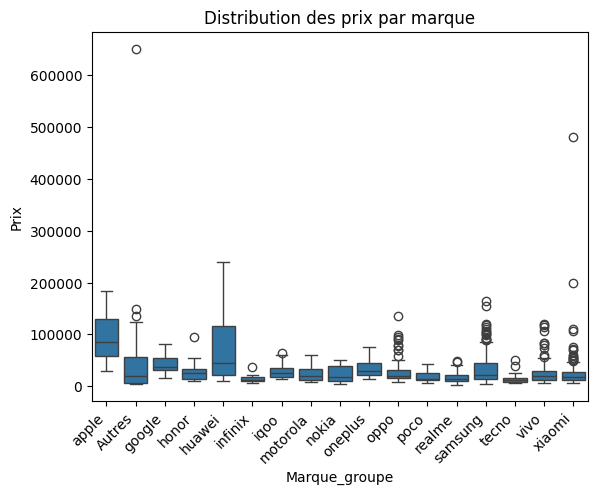

In [59]:
# Créer une nouvelle colonne "Marque_groupe" qui regroupe les marques ayant moins de 10 occurrences sous l'étiquette 'Autres'. N'hésitez pas à ajuster ce seuil (10) selon vos données.
df['Marque_groupe'] = df['Marque'].apply(lambda x: x if df['Marque'].value_counts()[x] > 10 else 'Autres')

# Créer le boxplot avec la nouvelle colonne
sns.boxplot(x='Marque_groupe', y='Prix', data=df)
plt.title('Distribution des prix par marque')
plt.xticks(rotation=45, ha='right')
plt.show()

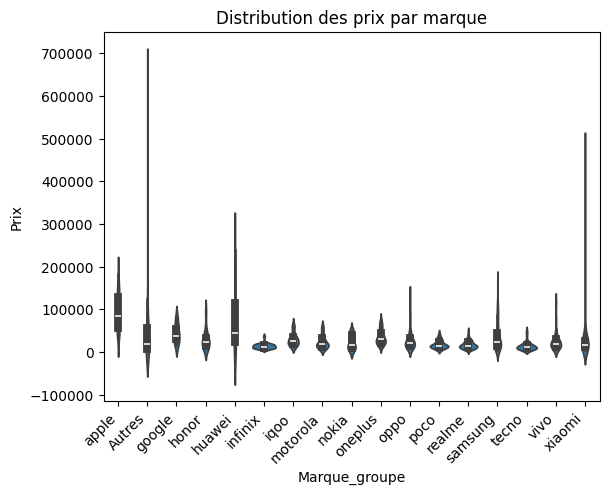

In [61]:
sns.violinplot(x='Marque_groupe', y='Prix', data=df)
plt.title('Distribution des prix par marque')
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



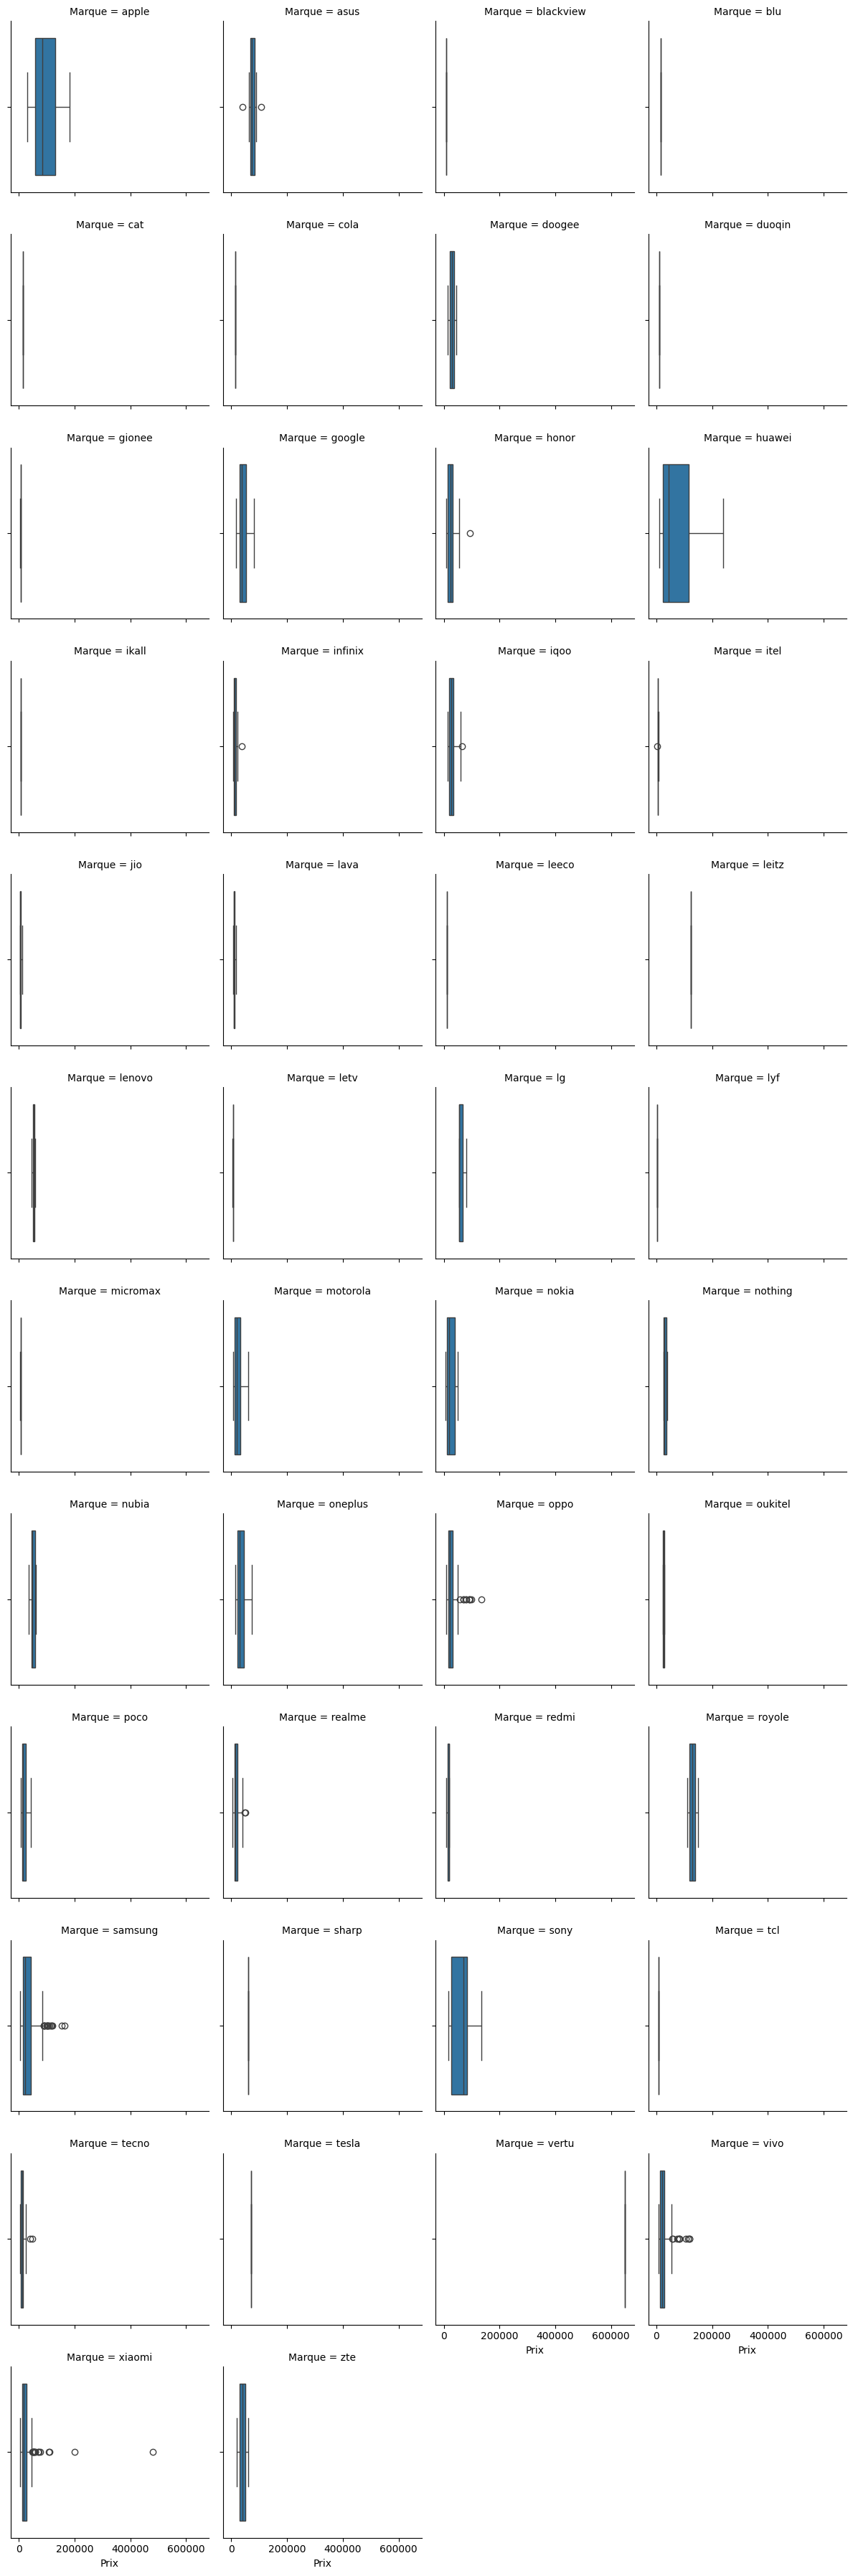

In [62]:
g = sns.FacetGrid(df, col='Marque', col_wrap=4, sharey=False) # col_wrap=4 crée 4 graphiques par ligne
g.map(sns.boxplot, 'Prix')
plt.show()

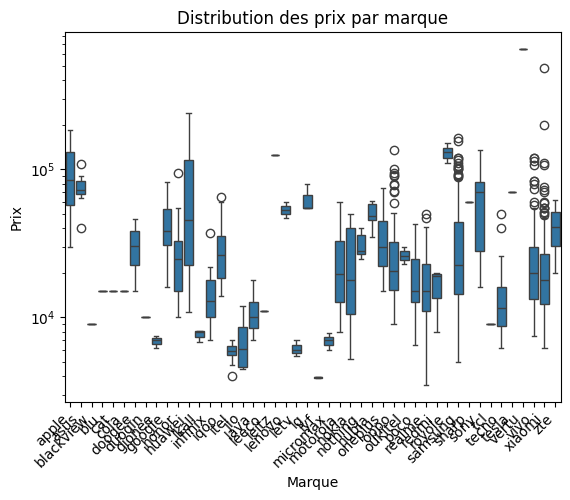

In [63]:
sns.boxplot(x='Marque', y='Prix', data=df)
plt.title('Distribution des prix par marque')
plt.xticks(rotation=45, ha='right')
plt.yscale('log') # Appliquer l'échelle logarithmique
plt.show()

In [67]:
import plotly.express as px

# Calculer la moyenne des prix pour chaque marque
order = df.groupby('Marque')['Prix'].mean().sort_values(ascending=False).index

# Créer le boxplot avec l'ordre spécifié
fig = px.box(df,
             x='Marque',
             y='Prix',
             title='Distribution des prix par marque (trié par moyenne)',
             category_orders={'Marque': order.tolist()},
             hover_data=['Modèle'])  # Afficher le modèle au survol
fig.update_xaxes(tickangle=45)
fig.update_layout(width=1000, height=600)  # Ajuster la taille
fig.show()

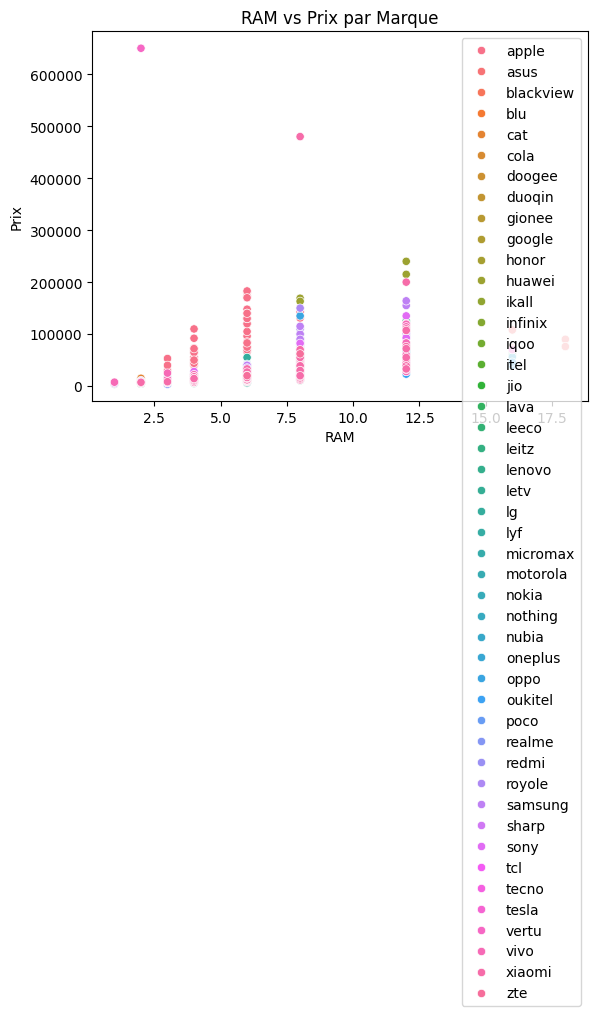

In [48]:
sns.scatterplot(x='RAM', y='Prix', hue='Marque', data=df)
plt.xlabel('RAM')
plt.ylabel('Prix')
plt.title('RAM vs Prix par Marque')
plt.legend() # adding a legend to the plot
plt.show()

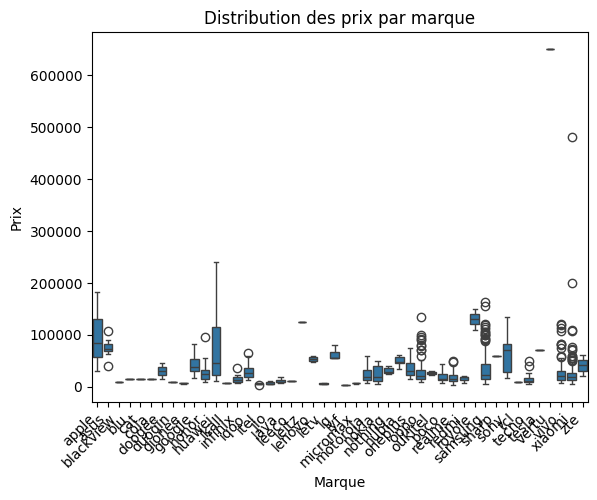

In [49]:
sns.boxplot(x='Marque', y='Prix', data=df)
plt.title('Distribution des prix par marque')
plt.xticks(rotation=45, ha='right')
plt.show()

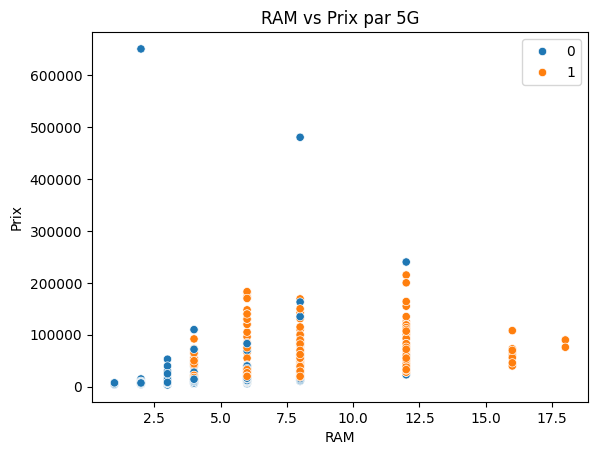

In [50]:
sns.scatterplot(x='RAM', y='Prix', hue='5G', data=df)
plt.xlabel('RAM')
plt.ylabel('Prix')
plt.title('RAM vs Prix par 5G')
plt.legend() # adding a legend to the plot
plt.show()

In [51]:
sns.violinplot(x='Système d\'exploitation', y='Note Moyenne', data=df)
plt.title('Distribution des notes par système d\'exploitation')
plt.xticks(rotation=45, ha='right')
plt.show()

ValueError: Could not interpret value `Système d'exploitation` for `x`. An entry with this name does not appear in `data`.

In [52]:
fig = px.bar(df.groupby('Marque Processeur')['Prix'].mean().reset_index(),
             x='Marque Processeur', y='Prix', title='Prix moyen par marque de processeur')
fig.update_xaxes(tickangle=45, tickmode='linear')
fig.show()

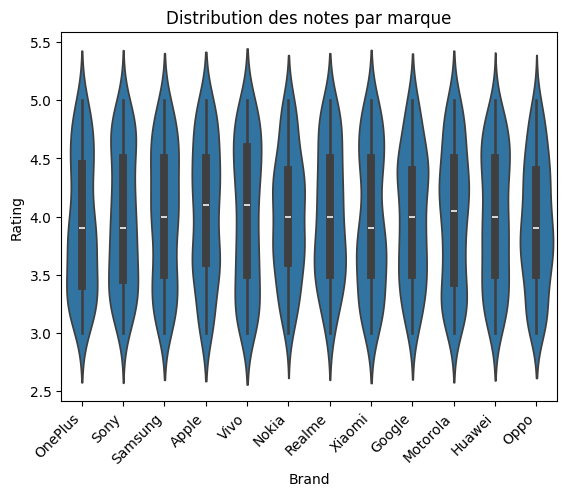

In [35]:
sns.violinplot(x='Brand', y='Rating', data=df)
plt.title('Distribution des notes par marque')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
fig = px.bar(df.groupby('Brand')['Price (USD)'].mean().reset_index(),
             x='Brand', y='Price (USD)', title='Prix moyen par marque')
fig.update_xaxes(tickangle=45, tickmode='linear')
fig.show()

In [53]:
fig = px.scatter(df, x='Taille Écran', y='Prix', size='Capacité Batterie',
                 color='Marque', title='Taille de l''écran vs Prix, avec Capacité Batterie comme taille des points',
                 hover_data=['Modèle'])
fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [54]:
fig = px.imshow(df.corr(), title='Matrice de corrélation',
                x=df.select_dtypes(include=['number']).columns,
                y=df.select_dtypes(include=['number']).columns)
fig.show()

ValueError: could not convert string to float: 'apple'